this notebook consist of code that helps us to visualize and manipulate timeseries data

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


we will be working on stats models inbuilt dataset which is atomspheric co2 collected from continuous air samoles at mauna loa observatory in hawaii from march 1958 to december 2001

In [3]:
data=sm.datasets.co2.load_pandas()

In [4]:
co2=data.data

In [6]:
co2.head(5)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [14]:
co2.head(5)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


when working with timeseries data make sure that dates are set as index we can check this by running the following code

In [15]:
co2.index #prints values of index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [17]:
#using resample we can change the timeseries from weekly data to monthly data
#which allows us to group the timesries data into the buckests of months
#ans we take average 
y=co2['co2'].resample('MS').mean()

In [18]:
co2

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [21]:
y.head(5)#prints first 5 months and co2 emissions

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [ ]:
#one feature of pandas is its ability to handle date stamp indices which helps us
#to slice the data
y['1990':]#pritns data after 1990
y['1992':'1995']#prints data after 1992 to 1995

In [25]:
#with data properly indexed using dates as index we can move to next step for
#handling missing values

In [30]:
y.isnull() #checks each value is null
y.isnull().any() #tells if there are any null values
y.isnull().sum()#prints the number of null values in the dataset

5

we can see there are 5 null values we generally use fill na to fill null values

In [33]:
y=y.fillna(y.bfill())

with null values filled we can once again check for null values using isnull function

We have sucessfully cleande our data and now it is time to visualise. when visualizing time series data a few things can be revelived such as seasonality ,trend, noise 

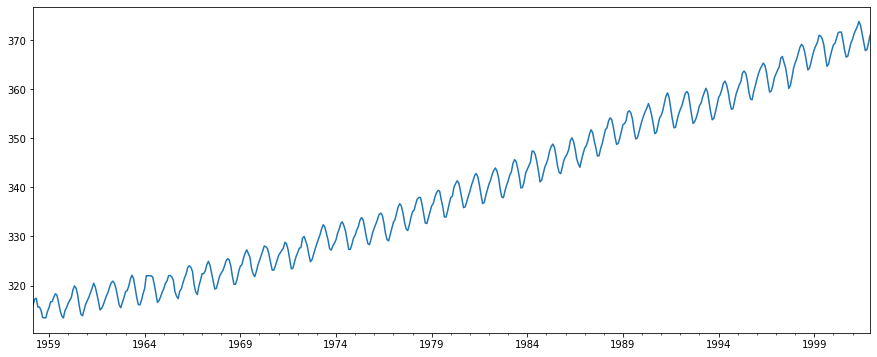

In [37]:
import matplotlib.pyplot as plt
y.plot(figsize=(15,6))
plt.show()

we can also visualize data using time series decomposition .it helps our time series model to decompose into 3 components trend, seasonality and noise

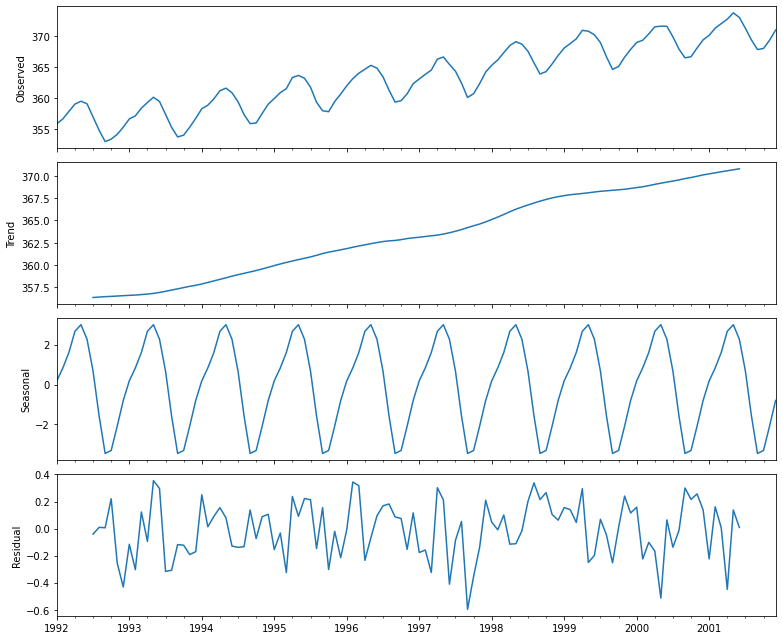

In [45]:
from pylab import rcParams
rcParams['figure.figsize']=11,9
decomposition=sm.tsa.seasonal_decompose(y,model='additive')#for all data if we want specific year use  y['1990':]
fig=decomposition.plot()
plt.show()